In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# !pip install prettytable
# !pip install xgboost

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from prettytable import PrettyTable
import xgboost as xgb

In [2]:
df = pd.read_csv('data.csv')
pd.set_option("display.max_columns",25)
print('Shape of dataframe',df.shape)
df

Shape of dataframe (12684, 25)


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [3]:
# Null Value Dataframe

missing_value = df.isnull().sum()*100/len(df)
missing_df = pd.DataFrame({'MissingValueCount': df.isnull().sum(),'MissingPercentage': missing_value})
missing_df[missing_df['MissingValueCount']!=0]

,MissingValueCount,MissingPercentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


In [4]:
# Handling Missing Values with Mode Imputation

# There is more than 99% missing values in 'car' rows, so drop this column
df1 = df.drop('car', axis = 1)

df1['Bar'] = df1['Bar'].fillna(df1['Bar'].value_counts().index[0])
df1['CoffeeHouse'] = df1['CoffeeHouse'].fillna(df1['CoffeeHouse'].value_counts().index[0])
df1['CarryAway'] = df1['CarryAway'].fillna(df1['CarryAway'].value_counts().index[0])
df1['RestaurantLessThan20'] = df1['RestaurantLessThan20'].fillna(df1['RestaurantLessThan20'].value_counts().index[0])
df1['Restaurant20To50'] = df1['Restaurant20To50'].fillna(df1['Restaurant20To50'].value_counts().index[0])

In [5]:
# Drop insignificant columns

df1 = df1.drop(['direction_same','direction_opp','toCoupon_GEQ5min'], axis=1)
df1

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0


In [6]:
# Perform Feature Engineering for To Coupon

tocoupon = []
for index, row in df1.iterrows():
    if (row['toCoupon_GEQ15min']==1 and row['toCoupon_GEQ25min']==0):
        tocoupon.append(0)
    elif (row['toCoupon_GEQ15min']==1 and row['toCoupon_GEQ25min']==1):
        tocoupon.append(1)
    else:
        tocoupon.append(2)
df1['tocoupon'] = tocoupon
df1 = df1.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis = 1)

In [7]:
# Perform Feature Engineering for Coupon Frequency
couponfreq = []
for index, row in df1.iterrows():
    if row['coupon'] == 'Restaurant(<20)':
        couponfreq.append(row['RestaurantLessThan20'])
    elif row['coupon'] == 'Carry out & Take away':
        couponfreq.append(row['CarryAway'])
    elif row['coupon'] == 'Coffee House':
        couponfreq.append(row['CoffeeHouse'])
    elif row['coupon'] == 'Bar':
        couponfreq.append(row['Bar'])
    elif row['coupon'] == 'Restaurant(20-50)':
        couponfreq.append(row['Restaurant20To50'])
df1['couponfreq'] = couponfreq
df1 = df1.drop(['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'], axis = 1)

In [8]:
df1

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Accept(Y/N?),tocoupon,couponfreq
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,1,2,4~8
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,2,never
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,1,0,1~3
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,never
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,1,2,1~3
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,1,2,1~3
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,2,never
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,1,never


In [9]:
# 
print(df1['occupation'].nunique())
df1['occupation'].value_counts()

# There are 25 unique occupations in the dataset

25


Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


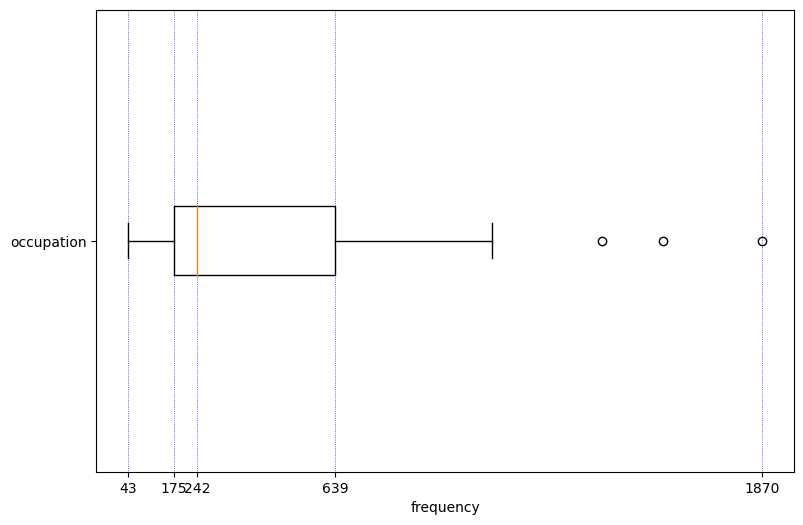

In [9]:
# Calculate value counts
value_counts = pd.DataFrame(df1['occupation'].value_counts().reset_index())
# Rename the columns
value_counts.columns = ['occupation', 'frequency']

# Sort the DataFrame by the category (optional)
value_counts = value_counts.sort_values('occupation')

# Display the resulting DataFrame
value_counts

# Create the boxplot
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ax.boxplot(value_counts['frequency'], vert=False, manage_ticks=True)
ax.set_xlabel('frequency')

categories = ['occupation']
ax.set_yticks(range(1, len(categories) + 1))
ax.set_yticklabels(categories)

quantiles = np.quantile(value_counts['frequency'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0.5] * quantiles.size, [1.5] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, len(categories) + 0.5)
ax.set_xticks(quantiles)

plt.show()

In [10]:
# Perform Feature Engineering for Occupation

# Based on the boxplot, we will classify the occupation into 4 groups.
# if the occupation frequency is less than 175 -> low acceptance
# if the occupation frequency 175 <= x < 242 -> medium low acceptance
# if the occupation frequency 242 <= x < 639 -> medium high acceptance
# if the occupation frequency >= 639 -> high acceptance

acceptance_occ = []
for index, row in value_counts.iterrows():
    if (row['frequency']<175):
        acceptance_occ.append('low')
    elif (145<= row['frequency'] < 242):
        acceptance_occ.append('medium_low')
    elif (242<= row['frequency'] < 639):
        acceptance_occ.append('medium_high')
    else:
        acceptance_occ.append('high')
value_counts['acceptance'] = acceptance_occ
value_counts

df2 = value_counts.drop('frequency', axis = 1)
df3 = pd.merge(df2, df1, how = 'inner', on = 'occupation')

In [11]:
df3 = df3.drop('occupation', axis = 1)
df3

,acceptance,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Accept(Y/N?),tocoupon,couponfreq
0,medium_low,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,$62500 - $74999,1,2,4~8
1,medium_low,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Bachelors degree,$62500 - $74999,0,2,less1
2,medium_low,No Urgent Place,Friend(s),Sunny,80,Bar,1d,Male,21,Single,0,Bachelors degree,$62500 - $74999,1,2,never
3,medium_low,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,$62500 - $74999,0,0,4~8
4,medium_low,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Male,21,Single,0,Bachelors degree,$62500 - $74999,0,2,less1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,high,Home,Partner,Rainy,55,Carry out & Take away,1d,Female,21,Unmarried partner,0,Bachelors degree,$37500 - $49999,1,2,1~3
12680,high,Work,Alone,Rainy,55,Carry out & Take away,1d,Female,21,Unmarried partner,0,Bachelors degree,$37500 - $49999,1,2,1~3
12681,high,Work,Alone,Snowy,30,Coffee House,1d,Female,21,Unmarried partner,0,Bachelors degree,$37500 - $49999,1,2,4~8
12682,high,Work,Alone,Snowy,30,Bar,1d,Female,21,Unmarried partner,0,Bachelors degree,$37500 - $49999,0,1,never


In [12]:
# Traintestsplit with the ratio of 70:15:15

X = df3.iloc[:, :20]
y = df3.iloc[:, -3]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size = X_test.shape[0]/X_train.shape[0], 
                                                      stratify = y_train)

In [13]:
# Encode the train dataset

encoder = OrdinalEncoder()
encode_train_df = encoder.fit_transform(X_train)
encode_train_df = pd.DataFrame(encode_train_df, columns = X_train.columns.values)
print(encode_train_df.shape)

# Encode test dataset
encode_test_df = encoder.fit_transform(X_test)
encode_test_df = pd.DataFrame(encode_test_df, columns = X_test.columns.values)
print(encode_test_df.shape)

# Encode validation dataset
encode_valid_df = encoder.fit_transform(X_valid)
encode_valid_df = pd.DataFrame(encode_valid_df, columns = X_valid.columns.values)
print(encode_valid_df.shape)

(7610, 16)
(2537, 16)
(2537, 16)


### Modelling

In [14]:
def Logistic_Regression(x_train, y_train, x_test, y_test):
    clf = LogisticRegression(random_state=0, C=1.0)  
    param_distributions = {'C':[0.01, 0.1, 1, 10, 100, 500]}
    model = RandomizedSearchCV(clf, param_distributions=param_distributions, cv=5, scoring='roc_auc')
    model.fit(x_train, y_train)
    best_C = model.best_params_['C']

    clf = LogisticRegression(random_state = 0, C= best_C).fit(x_train, y_train)

    Train_loss = log_loss(y_train, model.predict_proba(x_train))
    Train_AUC = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    Test_loss = log_loss(y_test, model.predict_proba(x_test))
    Test_AUC = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    report = classification_report(y_train, clf.predict(x_train))
    return Train_loss, Test_loss, best_C, Train_AUC, Test_AUC, report

Train_loss, Test_loss, best_C, Train_AUC, Test_AUC, report = Logistic_Regression(encode_train_df,y_train,encode_test_df,y_test)

In [15]:
summary_table = PrettyTable(["Model", "Hyperparameter1", "Train_loss", "Train_AUC", "Test_loss", "Test_AUC"])  # heading

summary_table.add_row(["Logistic Regression", best_C, round(Train_loss, 3), round(Train_AUC, 3), 
                       round(Test_loss, 3), round(Test_AUC, 3)])

table = pd.read_html(summary_table.get_html_string())
lr_result = table[0]
lr_result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,Logistic Regression,0.01,0.114,1.0,0.114,1.0


In [16]:
# K-Nearest Neighbor

def K_Neighbors_Classifier(x_train,y_train,x_test,y_test):
  clf = KNeighborsClassifier()
  parameters = {'n_neighbors':np.arange(25)}
  model = RandomizedSearchCV(clf, parameters, cv=5, scoring='roc_auc')
  model.fit(x_train, y_train)
  best_n_neighbors = model.best_params_['n_neighbors']

  clf = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(x_train, y_train)

  Train_loss = log_loss(y_train,clf.predict_proba(x_train))
  Train_AUC = roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])
  Test_loss = log_loss(y_test,clf.predict_proba(x_test))
  Test_AUC = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

  return best_n_neighbors,Train_loss,Test_loss, Train_AUC, Test_AUC, best_n_neighbors

best_n_neighbors,Train_loss,Test_loss, Train_AUC, Test_AUC, best_n_neighbors = K_Neighbors_Classifier(encode_train_df, y_train, encode_test_df, y_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(encode_valid_df, y_valid)

pred_proba = knn.predict_proba(encode_valid_df)
y_pred = knn.predict(encode_valid_df)

knn_logloss = log_loss(y_valid, pred_proba)

print(knn_logloss)
print(classification_report(y_valid, y_pred))

0.4109379179612263
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1095
           1       0.85      0.88      0.86      1442

    accuracy                           0.84      2537
   macro avg       0.84      0.84      0.84      2537
weighted avg       0.84      0.84      0.84      2537



In [18]:
summary_table = PrettyTable(["Model", "Hyperparameter1", "Train_loss", "Train_AUC", "Test_loss", "Test_AUC"])  # heading

summary_table.add_row(["KNN", best_n_neighbors, round(Train_loss, 3), round(Train_AUC, 3), 
                       round(Test_loss, 3), round(Test_AUC, 3)])

table = pd.read_html(summary_table.get_html_string())
knn_result = table[0]
knn_result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,KNN,24,0.406,0.934,0.433,0.908


In [19]:
# Decision Tree

def Decision_Tree_Classifier(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
    model = RandomizedSearchCV(dt, parameters, cv=5, scoring='roc_auc')
    model.fit(X_train, y_train)
    best_depth = model.best_params_['max_depth']
    best_samples_split = model.best_params_['min_samples_split']

    dt = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_samples_split, random_state=0)
    dt.fit(X_train, y_train)

    train_loss = log_loss(y_train, dt.predict_proba(X_train))
    Train_AUC = roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
    test_loss = log_loss(y_test, dt.predict_proba(X_test))
    Test_AUC = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    return best_depth, Train_loss,Test_loss, Train_AUC, Test_AUC

best_depth, Train_loss,Test_loss, Train_AUC, Test_AUC = Decision_Tree_Classifier(encode_train_df, y_train, encode_test_df, y_test)

In [20]:
dt = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5)
dt.fit(encode_valid_df, y_valid)

pred_proba = dt.predict_proba(encode_valid_df)
y_pred = dt.predict(encode_valid_df)

dt_logloss = log_loss(y_valid, pred_proba)

print(dt_logloss)
print(classification_report(y_valid, y_pred))

9.992007221626413e-16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00      1442

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537



In [21]:
summary_table = PrettyTable(["Model","Hyperparameter1", "Train_loss", "Train_AUC", "Test_loss", "Test_AUC"])  # heading

summary_table.add_row(["DecisionTree", best_depth, round(Train_loss, 3), round(Train_AUC, 3), 
                       round(Test_loss, 3), round(Test_AUC, 3)])

table = pd.read_html(summary_table.get_html_string())
dt_result = table[0]
dt_result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,DecisionTree,10,0.406,1.0,0.433,1.0


In [22]:
# SVM

def svm(X_train, y_train, X_test, y_test):
    svm = SVC(C=1.0, kernel='rbf', class_weight='balanced', probability=True)
    parameters = {'C': [0.1, 1, 10, 100, 500]}
    model = RandomizedSearchCV(svm, parameters, cv=5, scoring='roc_auc')
    model.fit(X_train, y_train)
    best_c = model.best_params_['C']
    
    svm = SVC(C=best_c, kernel='rbf', class_weight='balanced', probability=True)
    svm.fit(X_train, y_train)
    
    train_loss = log_loss(y_train, dt.predict_proba(X_train))
    Train_AUC = roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
    test_loss = log_loss(y_test, dt.predict_proba(X_test))
    Test_AUC = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    
    return best_c, train_loss, Train_AUC, test_loss, Test_AUC

best_c, train_loss, Traini_AUC, test_loss, Test_AUC = svm(encode_train_df, y_train, encode_test_df, y_test)

In [23]:
svm = SVC(C=0.1, kernel='rbf', class_weight='balanced', probability=True)
svm.fit(encode_valid_df, y_valid)

pred_proba = svm.predict_proba(encode_valid_df)
y_pred = svm.predict(encode_valid_df)

svm_logloss = log_loss(y_valid, pred_proba)
print(svm_logloss)
print(classification_report(y_valid, y_pred))

0.004798325061954546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00      1442

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537



In [24]:
summary_table = PrettyTable(["Model","Hyperparameter1", "Train_loss", "Train_AUC", "Test_loss", "Test_AUC"])  # heading

summary_table.add_row(["SVM",best_c,round(Train_loss, 3), round(Train_AUC, 3), 
                       round(Test_loss, 3), round(Test_AUC, 3)])

table = pd.read_html(summary_table.get_html_string())
svm_result = table[0]
svm_result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,SVM,0.1,0.406,1.0,0.433,1.0


In [25]:
# RandomForest

def Random_Forest_classifier(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, max_features='log2',
                                random_state=42, n_jobs=-1)
    parameters = {'max_depth': [20, 50, 60, 80, 100]}
    model = RandomizedSearchCV(rf, parameters, cv=5, scoring='roc_auc')
    model.fit(X_train, y_train)
    best_depth = model.best_params_['max_depth']

    rf = RandomForestClassifier(criterion='gini', max_depth=best_depth, min_samples_leaf=3, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    train_loss = log_loss(y_train, dt.predict_proba(X_train))
    Train_AUC = roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
    test_loss = log_loss(y_test, dt.predict_proba(X_test))
    Test_AUC = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

    return best_depth, train_loss, Train_AUC, test_loss, Test_AUC

best_depth, train_loss, Train_AUC, test_loss, Test_AUC = Random_Forest_classifier(encode_train_df, y_train, 
                                                                                  encode_test_df, y_test)

In [26]:
rf = RandomForestClassifier(n_estimators = 10, max_features = 'log2', random_state = 42, n_jobs = -1)
rf.fit(encode_valid_df, y_valid)

pred_proba = svm.predict(encode_valid_df)
y_pred = rf.predict(encode_valid_df)

rf_logloss = log_loss(y_valid, pred_proba)
print(rf_logloss)
print(classification_report(y_valid, y_pred))

0.05445640724362453
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00      1442

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537



In [27]:
summary_table = PrettyTable(["Model","Hyperparameter1", "Train_loss", "Train_AUC", "Test_loss", "Test_AUC"])  # heading

summary_table.add_row(["Random Forest",best_depth, round(Train_loss, 3), round(Train_AUC, 3), 
                       round(Test_loss, 3), round(Test_AUC, 3)])

table = pd.read_html(summary_table.get_html_string())
rf_result = table[0]
rf_result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,Random Forest,20,0.406,1.0,0.433,1.0


In [28]:
# Bagging

def Bagging(x_train, y_train, x_test, y_test):
    clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 1)
    parameters = {'n_estimators': [500, 1000, 2000]}
    model = RandomizedSearchCV(clf, parameters, cv = 5, scoring='roc_auc')
    model.fit(x_train, y_train)
    best_n_estimators = model.best_params_['n_estimators']
    
    clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = best_n_estimators, random_state = 1)
    clf.fit(x_train, y_train)
    
    Train_loss = log_loss(y_train,clf.predict_proba(x_train))
    Train_AUC = roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])
    Test_loss = log_loss(y_test,clf.predict_proba(x_test))
    Test_AUC = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
    
    return best_n_estimators,Train_loss,Train_AUC,Test_loss,Test_AUC

best_n_estimators,Train_loss,Train_AUC,Test_loss,Test_AUC = Bagging(encode_train_df, y_train, encode_test_df, y_test)

In [29]:
bagging = BaggingClassifier(n_estimators = best_n_estimators, random_state = 1, n_jobs = -1)
bagging.fit(encode_valid_df, y_valid)

pred_proba = bagging.predict(encode_valid_df)
y_pred = bagging.predict(encode_valid_df)

bagging_logloss = log_loss(y_valid, pred_proba)
print(bagging_logloss)
print(classification_report(y_valid, y_pred))

9.992007221626413e-16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00      1442

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537



In [30]:
summary_table = PrettyTable(["Model","Hyperparameter1", "Train_loss", "Train_AUC", "Test_loss", "Test_AUC"])  # heading

summary_table.add_row(["Bagging",best_n_estimators, round(Train_loss, 3), round(Train_AUC, 3), 
                       round(Test_loss, 3), round(Test_AUC, 3)])

table = pd.read_html(summary_table.get_html_string())
bagging_result = table[0]
bagging_result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,Bagging,500,0.0,1.0,0.0,1.0


In [31]:
# XGBoost

def XGB_Classifier(x_train,y_train,x_test,y_test):
  clf = xgb.XGBClassifier()
  parameters = {'max_depth':[1, 5, 10, 50]}
  model = RandomizedSearchCV(clf, parameters, cv=5, scoring='roc_auc')
  model.fit(x_train, y_train)
  best_depth = model.best_params_['max_depth']

  clf = xgb.XGBClassifier(max_depth=best_depth)
  clf.fit(x_train, y_train)

  Train_loss = log_loss(y_train,clf.predict_proba(x_train))
  Train_AUC = roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])
  Test_loss = log_loss(y_test,clf.predict_proba(x_test))
  Test_AUC = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

  return best_depth,best_n_estimators,Train_loss,Train_AUC,Test_loss,Test_AUC

In [33]:
xgb = xgb.XGBClassifier(max_depth = best_depth)
xgb.fit(encode_valid_df, y_valid)

pred_proba = xgb.predict(encode_valid_df)
y_pred = xgb.predict(encode_valid_df)

xgb_logloss = log_loss(y_valid, pred_proba)
print(xgb_logloss)
print(classification_report(y_valid, y_pred))

9.992007221626413e-16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00      1442

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537



In [34]:
summary_table = PrettyTable(["Model","Hyperparameter1", "Train_loss", "Train_AUC", "Test_loss", "Test_AUC"])  # heading

summary_table.add_row(["XGBoost",best_depth, round(Train_loss, 3), round(Train_AUC, 3), 
                       round(Test_loss, 3), round(Test_AUC, 3)])

table = pd.read_html(summary_table.get_html_string())
xgb_result = table[0]
xgb_result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,XGBoost,20,0.0,1.0,0.0,1.0


In [35]:
# Model Comparison

Model_Result = [lr_result, knn_result, dt_result,svm_result, rf_result, bagging_result, xgb_result] 
Result = pd.concat(Model_Result,ignore_index=True)
Result

,Model,Hyperparameter1,Train_loss,Train_AUC,Test_loss,Test_AUC
0,Logistic Regression,0.01,0.114,1.000,0.114,1.000
1,KNN,24.00,0.406,0.934,0.433,0.908
2,DecisionTree,10.00,0.406,1.000,0.433,1.000
3,SVM,0.10,0.406,1.000,0.433,1.000
4,Random Forest,20.00,0.406,1.000,0.433,1.000
5,Bagging,500.00,0.000,1.000,0.000,1.000
6,XGBoost,20.00,0.000,1.000,0.000,1.000
